# CNN Experiments in time series

In [128]:
import numpy
import pandas
import matplotlib.pyplot as plt

In [191]:
class GARCHTimeSeriesDataGenerator:
    """
    A class for generating time series data using the GARCH process.

    Parameters:
    - start_date (str): The start date of the time series.
    - years (int): The number of years to simulate. Default is 1.
    - mu (float): The mean of the GARCH process. Default is 0.
    - omega (float): The constant term in the GARCH process. Default is 0.1.
    - alpha (list): The list of alpha coefficients in the GARCH process. Default is [0.5].
    - beta (list): The list of beta coefficients in the GARCH process. Default is [0.5].
    """

    def __init__(self, start_date, years=1, mu=0, omega=0.1, alpha=[0.5], beta=[0.5]):
        self.start_date = pandas.to_datetime(start_date)
        self.years = years
        self.mu = mu
        self.omega = omega
        self.alpha = alpha
        self.beta = beta

    def simulate(self, n) -> pandas.Series:
        """
        Simulates a GARCH process and returns a pandas Series of simulated returns.

            Parameters:
            - n (int): The number of periods to simulate.

            Returns:
            - simulated_series (pandas.Series): A pandas Series of simulated returns.
        """
        # Calculate the total number of periods
        total_periods = n * self.years

        # Initialize arrays
        errors = numpy.random.normal(size=total_periods)
        sigmas = numpy.zeros_like(errors)
        returns = numpy.zeros_like(errors)

        # Simulate GARCH process
        for t in range(1, total_periods):
            sigmas[t] = numpy.sqrt(
                self.omega + self.alpha[0] * errors[t-1]**2 + self.beta[0] * sigmas[t-1]**2)
            returns[t] = self.mu + sigmas[t] * errors[t]

        # Create date range
        dates = pandas.date_range(self.start_date, periods=total_periods)

        # Create pandas Series
        simulated_series = pandas.Series(returns, index=dates)

        return simulated_series


### First Experiment

This first experiment uses a CNN for unsupervised anomaly detection, by mapping a value to a canvas of pixels.



In [192]:
# Create a GARCH time series data generator
generator = GARCHTimeSeriesDataGenerator(start_date="2023-01-01")

# Simulate 365 days of data (assuming daily data)
data = generator.simulate(730)

# Normalize data to a range of 0 to 16777215
normalized_data = (data - data.min()) / (data.max() - data.min()) * 16777215

In [193]:
# Create a canvas with 365 pixels
canvas = numpy.zeros((normalized_data.size, 3), dtype=numpy.uint8)
dates = []

# Iterate through each pixel and set the color based on normalized data
for i in range(normalized_data.size):
  # Extract the normalized value for the current day
  value = normalized_data.iloc[i]
  date = normalized_data.index[i]
  # Convert the value to RGB components
  red = (int(value) & 0x00FF0000) >> 16
  green = (int(value) & 0x0000FF00) >> 8
  blue = int(value) & 0x000000FF

  # Set the pixel's RGB values
  canvas[i] = [red, green, blue]
  dates.append(date)

canvas_dictionary = {dates[i]: canvas[i] for i in range(len(dates))}

In [194]:
plt.imshow(canvas_dictionary.values())
plt.axis('off')

(-0.5, 2.5, 729.5, -0.5)

In [197]:
import datetime

# Create dictionaries for each month
canvas_dictionaries_by_month = {}
start_year = list(canvas_dictionary.keys())[0].year
end_year = list(canvas_dictionary.keys())[-1].year
for year in range(start_year, end_year + 1):
    for month in range(1, 13):
        # Filter canvas_dictionary by month and year
        filtered_dictionary = {key: value for key, value in canvas_dictionary.items() if key.month == month and key.year == year}
        # Add filtered dictionary to canvas_dictionaries_by_month
        month_name = datetime.date(1900, month, 1).strftime('%B')
        canvas_dictionaries_by_month[f'canvas_dictionary_{month_name.lower()}_{year}'] = filtered_dictionary

# Print the canvas dictionaries for each month and year
for month, dictionary in canvas_dictionaries_by_month.items():
    print("\n-----------------")
    print(f'{month}: {dictionary}')
    print("-----------------\n")



-----------------
canvas_dictionary_january_2023: {Timestamp('2023-01-01 00:00:00'): array([135,  43, 187], dtype=uint8), Timestamp('2023-01-02 00:00:00'): array([135,  12, 209], dtype=uint8), Timestamp('2023-01-03 00:00:00'): array([139, 161, 119], dtype=uint8), Timestamp('2023-01-04 00:00:00'): array([167, 226, 178], dtype=uint8), Timestamp('2023-01-05 00:00:00'): array([151, 250,  79], dtype=uint8), Timestamp('2023-01-06 00:00:00'): array([149,  84,  37], dtype=uint8), Timestamp('2023-01-07 00:00:00'): array([102, 235,  78], dtype=uint8), Timestamp('2023-01-08 00:00:00'): array([131,  84,   2], dtype=uint8), Timestamp('2023-01-09 00:00:00'): array([ 82, 107, 239], dtype=uint8), Timestamp('2023-01-10 00:00:00'): array([186,  41, 117], dtype=uint8), Timestamp('2023-01-11 00:00:00'): array([181,  29, 114], dtype=uint8), Timestamp('2023-01-12 00:00:00'): array([134, 221, 182], dtype=uint8), Timestamp('2023-01-13 00:00:00'): array([123,  12,  97], dtype=uint8), Timestamp('2023-01-14 00:

-----canvas_dictionary_january_2023-----


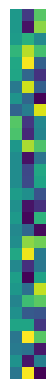

-----canvas_dictionary_february_2023-----


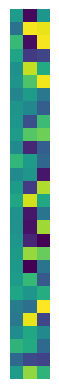

-----canvas_dictionary_march_2023-----


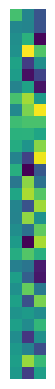

-----canvas_dictionary_april_2023-----


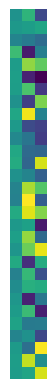

-----canvas_dictionary_may_2023-----


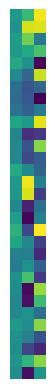

-----canvas_dictionary_june_2023-----


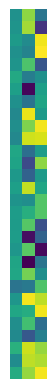

-----canvas_dictionary_july_2023-----


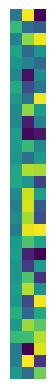

-----canvas_dictionary_august_2023-----


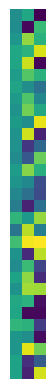

-----canvas_dictionary_september_2023-----


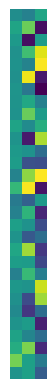

-----canvas_dictionary_october_2023-----


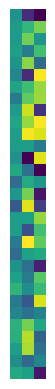

-----canvas_dictionary_november_2023-----


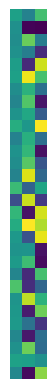

-----canvas_dictionary_december_2023-----


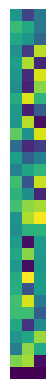

-----canvas_dictionary_january_2024-----


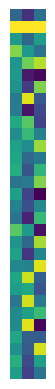

-----canvas_dictionary_february_2024-----


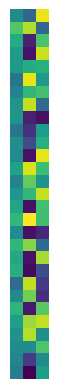

-----canvas_dictionary_march_2024-----


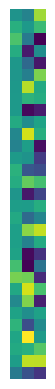

-----canvas_dictionary_april_2024-----


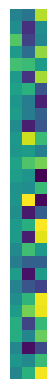

-----canvas_dictionary_may_2024-----


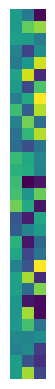

-----canvas_dictionary_june_2024-----


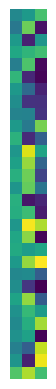

-----canvas_dictionary_july_2024-----


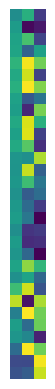

-----canvas_dictionary_august_2024-----


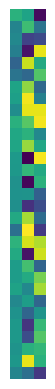

-----canvas_dictionary_september_2024-----


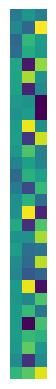

-----canvas_dictionary_october_2024-----


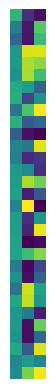

-----canvas_dictionary_november_2024-----


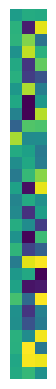

-----canvas_dictionary_december_2024-----


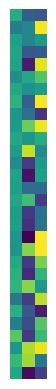

In [203]:
import os
# Specify the directory to store the images
directory = 'cnn_monthly_images/'

# Create the directory if it doesn't exist
if not os.path.exists(directory):
    os.makedirs(directory)
elif os.path.exists(directory):
    # Get a list of all files in the directory
    file_list = os.listdir(directory)
    if len(file_list) > 0:
        # Delete each file in the directory
        for file_name in file_list:
            file_path = os.path.join(directory, file_name)
            if file_path.endswith('.png'):
                os.remove(file_path)



for month, dictionary in canvas_dictionaries_by_month.items():
    canvas_dictionary_month = {key: value for key, value in dictionary.items()}
    print(f"-----{month}-----")
    plt.imshow(canvas_dictionary_month.values())
    plt.axis('off')
    plt.savefig(f'{directory}{month}.png')
    plt.show()

In [207]:
import os
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image
import torch.nn as nn
import torch.optim as optim

In [208]:

# Set the directory path of your images
image_directory = 'cnn_monthly_images/'

# Define a custom dataset class
class ImageDataset(Dataset):
    def __init__(self, image_files, transform=None):
        self.image_files = image_files
        self.transform = transform

    def __len__(self):
        return len(self.image_files)

    def __getitem__(self, idx):
        image = Image.open(self.image_files[idx])
        if self.transform:
            image = self.transform(image)
        return image

# Define the transformation to apply to the images
transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Get a list of all image file names in the directory
image_files = [os.path.join(image_directory, file) for file in os.listdir(image_directory) if file.endswith('.png')]

# Create the image dataset
dataset = ImageDataset(image_files, transform=transform)

# Create the data loader
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

# Define the autoencoder model
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.decoder = nn.Sequential(
            nn.Conv2d(16, 3, kernel_size=3, stride=1, padding=1),
            nn.Sigmoid(),
            nn.Upsample(scale_factor=2, mode='nearest')
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

# Create the autoencoder model
autoencoder = Autoencoder()

# Define the loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(autoencoder.parameters(), lr=0.001)

# Train the autoencoder
num_epochs = 10
for epoch in range(num_epochs):
    for images in dataloader:
        optimizer.zero_grad()
        reconstructions = autoencoder(images)
        loss = criterion(reconstructions, images)
        loss.backward()
        optimizer.step()

# Use the trained autoencoder to reconstruct the images
reconstructed_images = []
for images in dataloader:
    reconstructions = autoencoder(images)
    reconstructed_images.append(reconstructions.detach().numpy())
reconstructed_images = np.concatenate(reconstructed_images)

# Calculate the reconstruction error for each image
reconstruction_errors = np.mean(np.square(dataset[:len(reconstructed_images)].numpy() - reconstructed_images), axis=(1, 2, 3))

# Perform anomaly detection based on the reconstruction errors
threshold = np.percentile(reconstruction_errors, 95)  # Adjust the threshold as needed
anomalies = [image_files[i] for i, error in enumerate(reconstruction_errors) if error > threshold]

# Print the detected anomalies
print("Detected anomalies:")
for anomaly in anomalies:
    print(anomaly)

RuntimeError: The size of tensor a (4) must match the size of tensor b (3) at non-singleton dimension 0